# Problem Statement

> A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

> The company is looking at prospective properties to buy to enter the market. For that it required to build a regression model using regularization in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

------

> **The company wants to know:**
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

> Also, determine the optimal value of lambda for ridge and lasso regression.


> **Business Goal:** 
- To model the price of houses with the available independent variables.
- To understand how exactly the prices vary with the variables. 
- Manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
- For management to understand the pricing dynamics of a new market.

In [1]:
# Import useful libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

- Parameters and environment settings

In [2]:
# Supress warnings
import warnings
warnings.filterwarnings("ignore")

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
# Import dataset
housing = pd.read_csv('train.csv')

In [4]:
# Dataframe head
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Inspection and Handling

In [5]:
# Initial information
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Shape of DataFrame
housing.shape

(1460, 81)

- Before EDA and treating missing values, lets impute meaningful NA values i.e. `Fence` where NaN means Data is not missing but the particular facility or utilities is not available there.


In [7]:
# Impute meaningfull NaN values

d_NaN = {'No alley access': 'Alley', 'No Fence': 'Fence', 'No Pool': 'PoolQC', 'No Fireplace': 'FireplaceQu',
         'No Basement': ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'],
         'No Garage': ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']}

for k, v in d_NaN.items():
    if isinstance(v, list):
        for i in v:
            housing[i].fillna(k, inplace=True)
    else:
        housing[v].fillna(k, inplace=True)

- Mapping columns where values are described as number

In [8]:
# Replace values of 'OverallQual' and 'OverallCond' to its original categorical label
Qual_meter = {10: 'Very Excellent', 9: ' Excellent', 8: ' Very Good', 7: ' Good',
              6: ' Above Average', 5: ' Average', 4: ' Below Average', 3: ' Fair', 2: ' Poor', 1: ' Very Poor'}


housing['OverallQual'].replace(Qual_meter, inplace=True)
housing['OverallCond'].replace(Qual_meter, inplace=True)

# While 'MSSubClass' consist big label name so will convert int to string
housing['MSSubClass'] = housing['MSSubClass'].astype(str)

#Check datatype
housing[['MSSubClass','OverallQual','OverallCond']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MSSubClass   1460 non-null   object
 1   OverallQual  1460 non-null   object
 2   OverallCond  1460 non-null   object
dtypes: object(3)
memory usage: 34.3+ KB


## Exploratory Data Analysis

In [9]:
# Numerical Features
num = ['LotFrontage', 'MasVnrArea','GarageYrBlt','LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'YearBuilt', 'YearRemodAdd', 'YrSold','SalePrice']

In [10]:
# Find top most correlated numerical columns
corr_mat = housing[num].corr()
top_num_cols=corr_mat.nlargest(15,'SalePrice')['SalePrice'].index

corr_mat_top = housing[top_num_cols].corr()

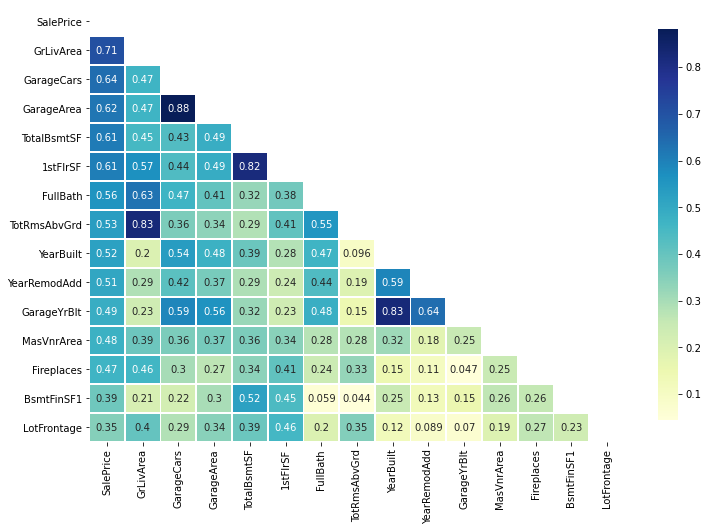

In [11]:
# looking for collinearty
mask = np.triu(np.ones_like(corr_mat_top, dtype=np.bool))
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_mat_top, mask=mask, annot=True,cmap="YlGnBu",ax=ax, linewidths=.7, cbar_kws={"shrink": 0.9})
plt.show()

<Figure size 1080x720 with 0 Axes>

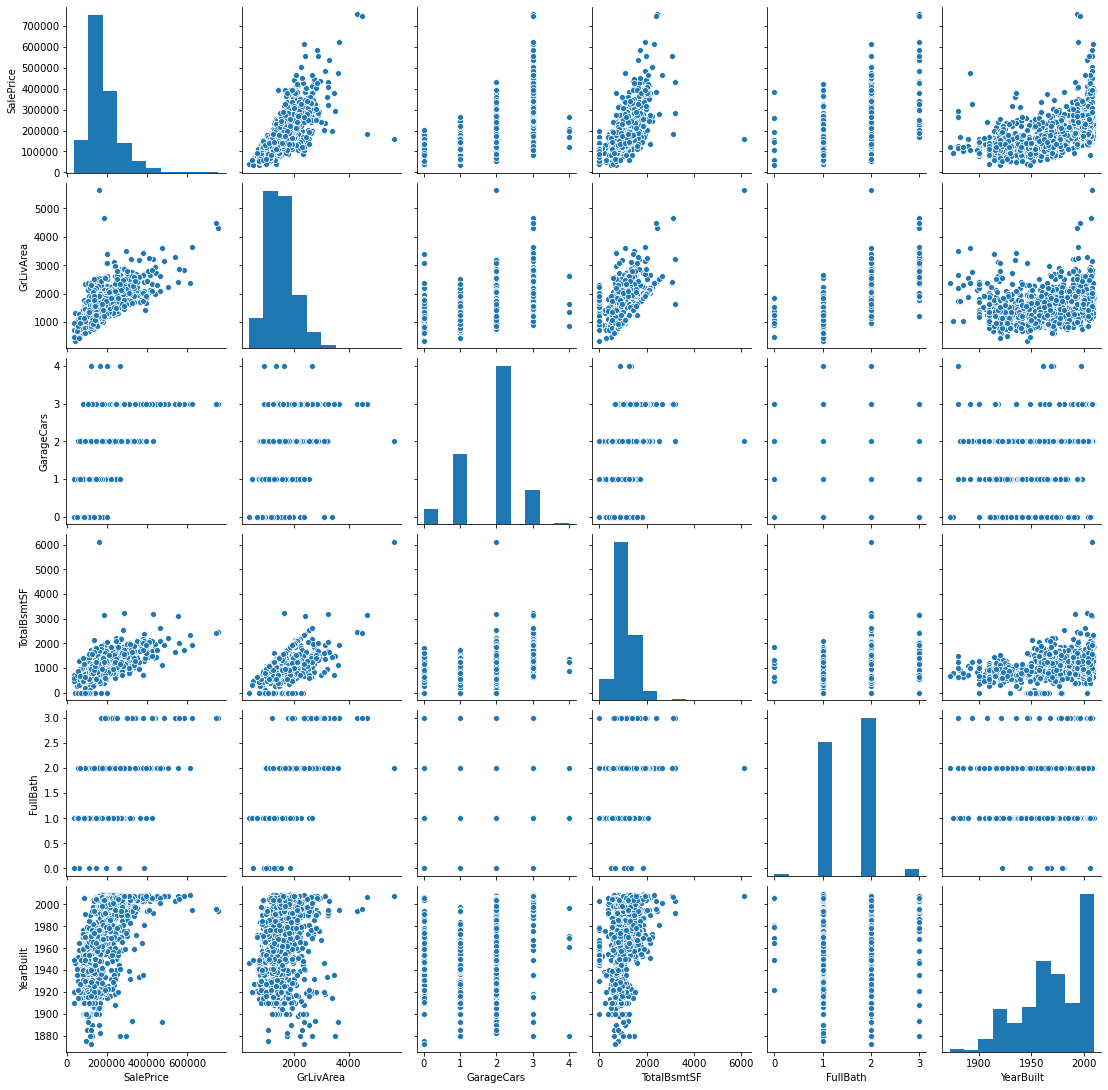

In [12]:
# Pair plot
plt.figure(figsize=[15, 10])
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(housing[cols], size = 2.5)
plt.show();

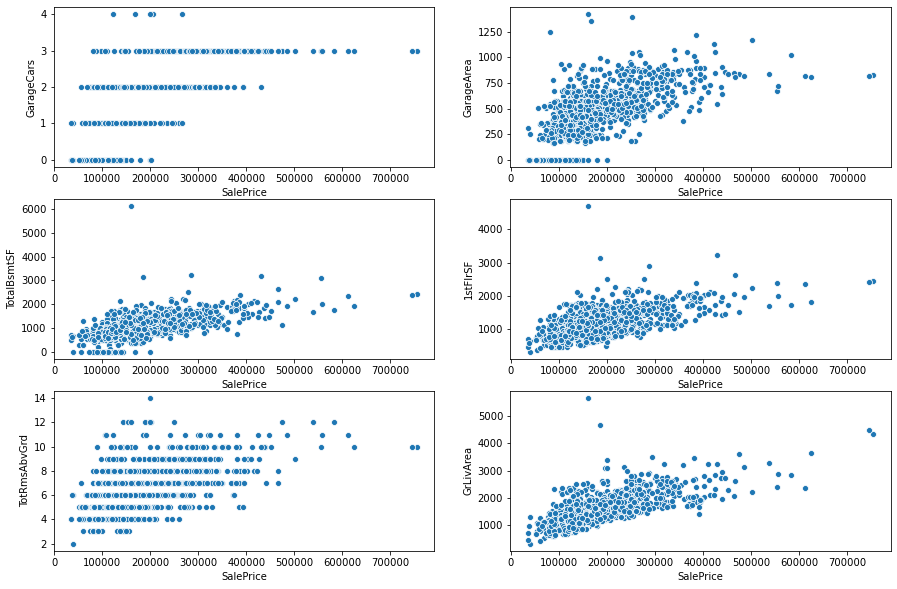

In [13]:
# scatter plot
col = ['GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'TotRmsAbvGrd', 'GrLivArea']

plt.figure(figsize=[15, 10])

for i in enumerate(col, 1):
    plt.subplot(3, 2, i[0])
    sns.scatterplot(housing['SalePrice'], housing[i[1]])

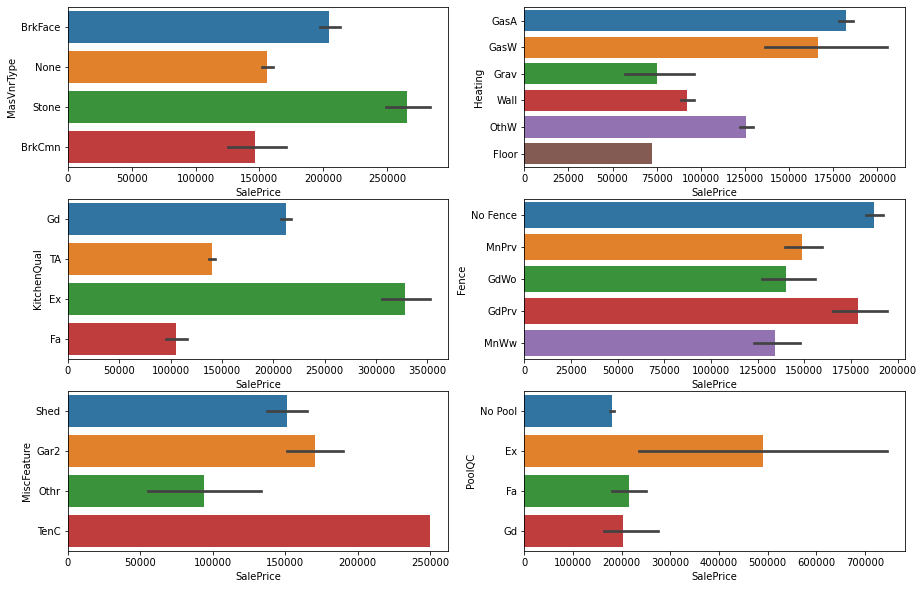

In [14]:
# Categorical columns
cat = ['MasVnrType', 'Heating', 'KitchenQual',
       'Fence', 'MiscFeature', 'PoolQC']

plt.figure(figsize=[15, 10])

for i in enumerate(cat, 1):
    plt.subplot(3, 2, i[0])
    sns.barplot(housing['SalePrice'], housing[i[1]])

**`SalePrice`** : Target variable transformation >

Skewness: 1.8828757597682129


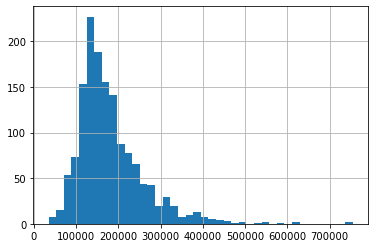

In [15]:
# Check distribution
print('Skewness: {}'.format(housing.SalePrice.skew()))
housing.SalePrice.hist(bins=40)
plt.show()

Skewness: 0.12134661989685333


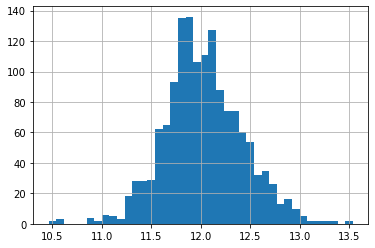

In [16]:
#log transforamtion of Target variable
housing["SalePrice"] = np.log1p(housing["SalePrice"])
print('Skewness: {}'.format(housing.SalePrice.skew()))
housing.SalePrice.hist(bins=40)
plt.show()

## Treating Missing Values and Features

- Defining Functions

In [17]:
# To get missing values DataFrame
def missing_val(data):
    total=data.isnull().sum().sort_values(ascending=False)
    percentage=round(total/data.shape[0]*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

# To get value counts DataFrame
def count_val(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

- Convert year features to the age

In [18]:
from datetime import datetime
currentYear = datetime.now().year


year_col = {'YearBuilt': 'AgeBuilt', 'YearRemodAdd': 'AgeRemodAdd',
            'GarageYrBlt': 'GarageAgeBlt', 'YrSold': 'AgeSold'}

for k,v in year_col.items():
    housing[v] = currentYear - housing[k]
    housing.drop(k, axis=1, inplace=True)

- Dropping the columns having missing values more than 80%

In [19]:
# Drop the column
display(missing_val(housing).head(7))
housing.drop('MiscFeature',axis=1,inplace = True)
missing_val(housing).head(7)


,Total,Percentage
MiscFeature,1406,96.30
LotFrontage,259,17.74
GarageAgeBlt,81,5.55
MasVnrArea,8,0.55
MasVnrType,8,0.55
Electrical,1,0.07
Street,0,0.00


,Total,Percentage
LotFrontage,259,17.74
GarageAgeBlt,81,5.55
MasVnrType,8,0.55
MasVnrArea,8,0.55
Electrical,1,0.07
BsmtCond,0,0.00
Exterior2nd,0,0.00


- Imputing missing values

In [20]:
# LotFrontage: impute by median

housing['LotFrontage'] = housing['LotFrontage'].fillna(housing['LotFrontage'].median())

# GarageAgeBlt: Impute with 0 age so after scaling and encoding it will be interpreted as there is no garage.
housing['GarageAgeBlt'] = housing['GarageAgeBlt'].fillna(0)
housing['GarageAgeBlt'] = housing['GarageAgeBlt'].astype(int)

# MasVnrType: impute by None
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')

# MasVnrArea: impute 0
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)

# Electrical: impute by mode
housing['Electrical'] = housing['Electrical'].fillna(housing['Electrical'].mode()[0])

- Capping where number of categorical values are more and skewed 

--- 

**`MSSubClass`** : The type of dwelling > 

In [21]:
# Value counts
count_val(housing,'MSSubClass')             

,Total,Percentage
20,536,36.71
60,299,20.48
50,144,9.86
120,87,5.96
30,69,4.73
160,63,4.32
70,60,4.11
80,58,3.97
90,52,3.56
190,30,2.05


In [22]:
# Label less frequent Class '000'
housing['MSSubClass'].replace(['190','85','75','45','180','40'], '000', inplace=True)

# Count values after capping
count_val(housing,'MSSubClass')

,Total,Percentage
20,536,36.71
60,299,20.48
50,144,9.86
000,92,6.30
120,87,5.96
30,69,4.73
160,63,4.32
70,60,4.11
80,58,3.97
90,52,3.56


--- 

**`Neighborhood`** : Physical locations within Ames city limits > 

In [23]:
# Value counts
count_val(housing,'Neighborhood')

,Total,Percentage
NAmes,225,15.41
CollgCr,150,10.27
OldTown,113,7.74
Edwards,100,6.85
Somerst,86,5.89
Gilbert,79,5.41
NridgHt,77,5.27
Sawyer,74,5.07
NWAmes,73,5.00
SawyerW,59,4.04


In [24]:
# Label less frequent as 'Other'
housing['Neighborhood'].replace(['Blmngtn', 'MeadowV',  'BrDale',  'Veenker',  'NPkVill',  'Blueste'],
                                'Other', inplace=True)

# Count values after capping
count_val(housing, 'Neighborhood')

,Total,Percentage
NAmes,225,15.41
CollgCr,150,10.27
OldTown,113,7.74
Edwards,100,6.85
Somerst,86,5.89
Gilbert,79,5.41
NridgHt,77,5.27
Sawyer,74,5.07
NWAmes,73,5.00
Other,72,4.93


In [25]:
# info after data cleaning 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [26]:
# Clean Dataframe
housing.describe()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,AgeBuilt,AgeRemodAdd,GarageAgeBlt,AgeSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,69.863699,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,12.024057,48.732192,35.134247,39.191781,12.184247
std,421.610009,22.027677,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,0.399449,30.202904,20.645407,25.807431,1.328095
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.460271,10.000000,10.000000,0.000000,10.000000
25%,365.750000,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,11.775105,20.000000,16.000000,17.000000,11.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,12.001512,47.000000,26.000000,35.500000,12.000000
75%,1095.250000,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,12.273736,66.000000,53.000000,58.000000,13.000000
max,1460.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,13.534474,148.000000,70.000000,120.000000,14.000000


## Data Preparation

- Dummy Variable Encoding



In [27]:
# Drop insignificance columns such as Id and MoSold
housing.drop(['Id','MoSold'],inplace=True, axis=1)

In [28]:
# List of categorical columns
cat_dict = housing.columns.to_series().groupby(housing.dtypes).groups
cat_dict = {k.name: v for k, v in cat_dict.items()}
cat_col = list(cat_dict['object'])

In [29]:
# Encoding Categorical Variable
housing_dummy = pd.get_dummies(housing[cat_col], drop_first = True)
housing_dummy.head()

,MSSubClass_120,MSSubClass_160,MSSubClass_20,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_ Average,OverallQual_ Below Average,OverallQual_ Excellent,OverallQual_ Fair,OverallQual_ Good,OverallQual_ Poor,OverallQual_ Very Good,OverallQual_ Very Poor,OverallQual_Very Excellent,OverallCond_ Average,OverallCond_ Below Average,OverallCond_ Excellent,OverallCond_ Fair,OverallCond_ Good,OverallCond_ Poor,OverallCond_ Very Good,OverallCond_ Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleConditio

In [30]:
# Drop categorical columns from main dataframe so only numerical left
housing.drop(cat_col, inplace = True, axis = 1)

In [31]:
# concat numerical columns and categorical dummy variables
housing = pd.concat([housing_dummy,housing],axis=1)
print(housing.shape)
housing.head()

(1460, 273)


,MSSubClass_120,MSSubClass_160,MSSubClass_20,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_ Average,OverallQual_ Below Average,OverallQual_ Excellent,OverallQual_ Fair,OverallQual_ Good,OverallQual_ Poor,OverallQual_ Very Good,OverallQual_ Very Poor,OverallQual_Very Excellent,OverallCond_ Average,OverallCond_ Below Average,OverallCond_ Excellent,OverallCond_ Fair,OverallCond_ Good,OverallCond_ Poor,OverallCond_ Very Good,OverallCond_ Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleConditio

- Train-Test Split

In [32]:
# Feature variable to X and target variable to y

X = housing.drop(['SalePrice'], axis=1)

y = housing['SalePrice']

In [33]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print("Shape of X Train and X Test data set: - ", X_train.shape, X_test.shape)

Shape of X Train and X Test data set: -  (1021, 272) (438, 272)


- Feature Scaling

In [34]:
# Scalling dataframe
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_col = ['LotFrontage', 'MasVnrArea','GarageAgeBlt','LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'AgeBuilt', 'AgeRemodAdd', 'AgeSold']

X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])


X_train.describe()

,MSSubClass_120,MSSubClass_160,MSSubClass_20,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_ Average,OverallQual_ Below Average,OverallQual_ Excellent,OverallQual_ Fair,OverallQual_ Good,OverallQual_ Poor,OverallQual_ Very Good,OverallQual_ Very Poor,OverallQual_Very Excellent,OverallCond_ Average,OverallCond_ Below Average,OverallCond_ Excellent,OverallCond_ Fair,OverallCond_ Good,OverallCond_ Poor,OverallCond_ Very Good,OverallCond_ Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleConditio

## Model Building

In [35]:
# Import libraries
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

In [36]:
# list of alphas to tune
params = {'alpha': [0.00005, 0.0001, 0.0005, 0.0007, 0.001, 0.01, 0.05, 0.1,
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
folds = 5

### Ridge Regression

- RFE Ridge

In [37]:
# Model object
ridge = Ridge()

# Getting 50 important features
rfe = RFE(ridge, 40)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass_120', False, 19),
 ('MSSubClass_160', False, 96),
 ('MSSubClass_20', False, 126),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_50', False, 138),
 ('MSSubClass_60', False, 97),
 ('MSSubClass_70', False, 87),
 ('MSSubClass_80', False, 182),
 ('MSSubClass_90', False, 190),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', False, 33),
 ('Alley_No alley access', False, 201),
 ('Alley_Pave', False, 81),
 ('LotShape_IR2', False, 129),
 ('LotShape_IR3', False, 69),
 ('LotShape_Reg', False, 189),
 ('LandContour_HLS', False, 101),
 ('LandContour_Low', False, 99),
 ('LandContour_Lvl', False, 98),
 ('Utilities_NoSeWa', False, 38),
 ('LotConfig_CulDSac', False, 71),
 ('LotConfig_FR2', False, 130),
 ('LotConfig_FR3', False, 186),
 ('LotConfig_Inside', False, 170),
 ('LandSlope_Mod', False, 116),
 ('LandSlope_Sev', False, 180),
 ('Neighborhood_ClearCr', True, 1),
 ('Neighborhood_CollgCr', False, 147),
 ('Neighborho

In [38]:
col_rfe = X_train.columns[rfe.support_]

# Train dataset after rfe 
X_train_ridge = X_train[col_rfe]

# Test dataset after rfe 
X_test_ridge = X_test[col_rfe]

X_train_ridge.head()

,MSSubClass_30,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_ClearCr,Neighborhood_Crawfor,Condition2_PosA,Condition2_PosN,BldgType_Twnhs,OverallQual_ Excellent,OverallQual_ Good,OverallQual_ Poor,OverallQual_ Very Good,OverallQual_Very Excellent,OverallCond_ Below Average,OverallCond_ Fair,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,ExterQual_Fa,Functional_Sev,GarageQual_Gd,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,LotArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,KitchenAbvGr,TotRmsAbvGrd,GarageCars,ScreenPorch,AgeBuilt,AgeRemodAdd
210,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.019306,0.082920,0.141408,0.113889,0.000000,0.081860,0.333333,0.333333,0.0,0.181818,0.00,0.0,0.615942,1.000000
318,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.039403,0.174876,0.220458,0.231481,0.616949,0.424289,0.333333,0.666667,0.0,0.545455,0.75,0.0,0.123188,0.283333
239,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.033981,0.016655,0.120295,0.098611,0.333656,0.201576,0.000000,0.333333,0.0,0.363636,0.25,0.0,0.471014,1.000000
986,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.017931,0.000000,0.079378,0.145602,0.307022,0.230015,0.000000,0.333333,0.0,0.181818,0.25,0.0,0.724638,0.116667
1416,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.046139,0.000000,0.127169,0.202315,0.505569,0.355880,0.000000,0.666667,0.5,0.727273,0.50,0.0,0.905797,1.000000


In [39]:
# Cross validation
model_cv = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
model_cv.fit(X_train_ridge, y_train)

print("The best value of Alpha is: ", model_cv.best_params_)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best value of Alpha is:  {'alpha': 0.05}


[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    2.6s finished


In [40]:
# GridSearch fits results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=10]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006717,0.000861,0.003945,0.000637,5e-05,{'alpha': 5e-05},-0.086686,-0.103234,-0.094366,-0.086108,-0.079127,-0.089904,0.008228,8,-0.079895,-0.079964,-0.080864,-0.080065,-0.081863,-0.080530,0.000752
1,0.005000,0.000024,0.002790,0.000763,0.0001,{'alpha': 0.0001},-0.086686,-0.103234,-0.094367,-0.086108,-0.079127,-0.089904,0.008228,7,-0.079895,-0.079964,-0.080864,-0.080066,-0.081863,-0.080530,0.000752
2,0.006599,0.001320,0.003984,0.000628,0.0005,{'alpha': 0.0005},-0.086689,-0.103230,-0.094367,-0.086102,-0.079127,-0.089903,0.008227,6,-0.079895,-0.079965,-0.080865,-0.080069,-0.081865,-0.080532,0.000752
3,0.005885,0.000777,0.003179,0.000740,0.0007,{'alpha': 0.0007},-0.086691,-0.103229,-0.094368,-0.086100,-0.079127,-0.089903,0.008227,5,-0.079896,-0.079965,-0.080866,-0.080071,-0.081866,-0.080533,0.000752
4,0.007094,0.001472,0.004023,0.000744,0.001,{'alpha': 0.001},-0.086693,-0.103226,-0.094368,-0.086096,-0.079127,-0.089902,0.008226,4,-0.079896,-0.079966,-0.080866,-0.080074,-0.081867,-0.080534,0.000752


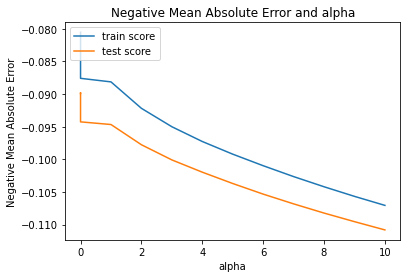

In [41]:
# Plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [42]:
ridge_model=Ridge(alpha=4)
ridge_model.fit(X_train_ridge,y_train)
y_pred_train=ridge_model.predict(X_train_ridge)
y_pred_test=ridge_model.predict(X_test_ridge)

print('Train: ' + str(round(r2_score(y_train,y_pred_train),2)))
print('Test: ' + str(round(r2_score(y_test, y_pred_test),2))) 

Train: 0.88
Test: 0.84


In [43]:
coeff = ridge_model.coef_
col = X_train_ridge.columns
col = col.insert(0,'Constant')
col_coeff = list(zip(col,coeff))
res = sorted(col_coeff, key = lambda x: x[1],reverse=True)
res

[('2ndFlrSF', 0.36854461102369007),
 ('TotalBsmtSF', 0.36155640148225093),
 ('BldgType_Twnhs', 0.3474140871784636),
 ('BsmtFinSF1', 0.34024616035395827),
 ('TotRmsAbvGrd', 0.3163093168765873),
 ('OverallQual_ Very Good', 0.2340901412494072),
 ('OverallQual_ Poor', 0.22748852461017324),
 ('KitchenAbvGr', 0.22112525666008878),
 ('LotArea', 0.19169076533104742),
 ('1stFlrSF', 0.19030468772518405),
 ('GrLivArea', 0.1769356595939327),
 ('Neighborhood_ClearCr', 0.15683363671747919),
 ('MSSubClass_30', 0.15093375134958806),
 ('MSZoning_RH', 0.1488212697757906),
 ('BsmtFullBath', 0.14612366293760548),
 ('PoolQC_No Pool', 0.14071361153273418),
 ('OverallCond_ Fair', 0.1370333194807869),
 ('PoolQC_Gd', 0.1298665168435608),
 ('MSZoning_FV', 0.12120364575042472),
 ('MSZoning_RM', 0.12075299022900375),
 ('GarageCars', 0.11152062604780871),
 ('Exterior1st_BrkComm', 0.10693762019130736),
 ('OverallQual_ Excellent', 0.10131475485810346),
 ('Functional_Sev', 0.0906041700599247),
 ('MSZoning_RL', 0.0645

### Lasso Regression

- RFE Lasso

In [44]:
# Model object
lasso = Lasso()

# Getting 50 important features
rfe = RFE(lasso, 40)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass_120', False, 233),
 ('MSSubClass_160', False, 232),
 ('MSSubClass_20', False, 231),
 ('MSSubClass_30', False, 230),
 ('MSSubClass_50', False, 229),
 ('MSSubClass_60', False, 228),
 ('MSSubClass_70', False, 227),
 ('MSSubClass_80', False, 226),
 ('MSSubClass_90', False, 225),
 ('MSZoning_FV', False, 224),
 ('MSZoning_RH', False, 223),
 ('MSZoning_RL', False, 222),
 ('MSZoning_RM', False, 221),
 ('Street_Pave', False, 220),
 ('Alley_No alley access', False, 219),
 ('Alley_Pave', False, 218),
 ('LotShape_IR2', False, 217),
 ('LotShape_IR3', False, 216),
 ('LotShape_Reg', False, 215),
 ('LandContour_HLS', False, 214),
 ('LandContour_Low', False, 213),
 ('LandContour_Lvl', False, 212),
 ('Utilities_NoSeWa', False, 211),
 ('LotConfig_CulDSac', False, 210),
 ('LotConfig_FR2', False, 209),
 ('LotConfig_FR3', False, 208),
 ('LotConfig_Inside', False, 207),
 ('LandSlope_Mod', False, 206),
 ('LandSlope_Sev', False, 205),
 ('Neighborhood_ClearCr', False, 204),
 ('Neighborhood_CollgCr

In [45]:
col_rfe = X_train.columns[rfe.support_]

# Train dataset after rfe 
X_train_lasso = X_train[col_rfe]

# Test dataset after rfe 
X_test_lasso = X_test[col_rfe]

X_train_lasso.head()

,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeBuilt,AgeRemodAdd,GarageAgeBlt,AgeSold
210,0,0,1,0,0,0,1,0,0.157534,0.019306,0.00,0.082920,0.0,0.169521,0.141408,0.113889,0.000000,0.0,0.081860,0.333333,0.0,0.333333,0.0,0.250,0.0,0.181818,0.000000,0.00,0.000000,0.000000,0.000000,0.173913,0.0,0.0,0.0,0.0,0.615942,1.000000,0.000000,0.50
318,0,0,1,0,0,0,1,0,0.236301,0.039403,0.16,0.174876,0.0,0.154110,0.220458,0.231481,0.616949,0.0,0.424289,0.333333,0.0,0.666667,0.5,0.500,0.0,0.545455,0.333333,0.75,0.462623,0.396733,0.114723,0.260870,0.0,0.0,0.0,0.0,0.123188,0.283333,0.225000,0.25
239,0,0,1,0,0,0,1,0,0.106164,0.033981,0.00,0.016655,0.0,0.274401,0.120295,0.098611,0.333656,0.0,0.201576,0.000000,0.0,0.333333,0.5,0.375,0.0,0.363636,0.333333,0.25,0.155148,0.000000,0.267686,0.000000,0.0,0.0,0.0,0.0,0.471014,1.000000,0.591667,0.00
986,0,0,1,0,0,0,1,0,0.130137,0.017931,0.00,0.000000,0.0,0.207620,0.079378,0.145602,0.307022,0.0,0.230015,0.000000,0.0,0.333333,0.0,0.250,0.0,0.181818,0.000000,0.25,0.179831,0.459743,0.000000,0.000000,0.0,0.0,0.0,0.0,0.724638,0.116667,0.583333,1.00
1416,0,0,1,0,0,0,1,0,0.133562,0.046139,0.00,0.000000,0.0,0.332620,0.127169,0.202315,0.505569,0.0,0.355880,0.000000,0.0,0.666667,0.0,0.500,0.5,0.727273,0.000000,0.50,0.394922,0.000000,0.000000,0.206522,0.0,0.0,0.0,0.0,0.905797,1.000000,0.408333,0.00


In [46]:
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lasso, y_train) 

print("The best value of Alpha is: ",model_cv.best_params_)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best value of Alpha is:  {'alpha': 0.0001}


[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    3.0s finished


In [47]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=10]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.032293,0.002256,0.003796,0.000428,5e-05,{'alpha': 5e-05},-0.102928,-0.122362,-0.125188,-0.115221,-0.110521,-0.115244,0.008044,2,-0.112883,-0.100772,-0.105610,-0.112678,-0.113208,-0.109030,0.005010
1,0.019831,0.001711,0.003398,0.000483,0.0001,{'alpha': 0.0001},-0.102928,-0.122102,-0.124719,-0.115125,-0.110297,-0.115034,0.007909,1,-0.113072,-0.100887,-0.105845,-0.112754,-0.113505,-0.109213,0.005030
2,0.012452,0.002339,0.004906,0.001083,0.0005,{'alpha': 0.0005},-0.104285,-0.121016,-0.123668,-0.115750,-0.113129,-0.115570,0.006761,3,-0.115303,-0.102401,-0.108814,-0.114244,-0.116379,-0.111428,0.005211
3,0.012564,0.000775,0.005009,0.000609,0.0007,{'alpha': 0.0007},-0.105335,-0.121250,-0.124164,-0.116709,-0.114961,-0.116484,0.006456,4,-0.116811,-0.103629,-0.110091,-0.115578,-0.117923,-0.112806,0.005320
4,0.011791,0.000788,0.005153,0.000749,0.001,{'alpha': 0.001},-0.106803,-0.121530,-0.125683,-0.118591,-0.117851,-0.118092,0.006280,5,-0.119001,-0.105209,-0.112221,-0.117588,-0.120036,-0.114811,0.005504


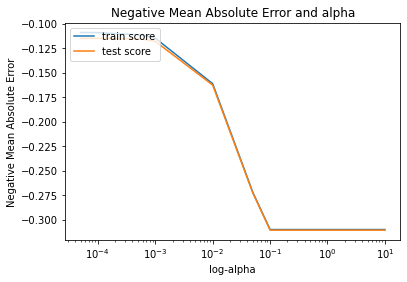

In [48]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('log-alpha')
plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [49]:
lasso_model=Lasso(alpha=0.0001)
lasso_model.fit(X_train_lasso,y_train)
y_pred_train=lasso_model.predict(X_train_lasso)
y_pred_test=lasso_model.predict(X_test_lasso)

print('Train: ' + str(round(r2_score(y_train,y_pred_train),2)))
print('Test: ' + str(round(r2_score(y_test, y_pred_test),2))) 

Train: 0.83
Test: 0.82


In [50]:
coeff = lasso_model.coef_
col = X_train_lasso.columns
col = col.insert(0,'Constant')
col_coeff = list(zip(col,coeff))
res = sorted(col_coeff, key = lambda x: x[1],reverse=True)
res

[('LowQualFinSF', 1.1179813696677),
 ('BsmtUnfSF', 0.5461054061178405),
 ('Fireplaces', 0.28243926296835276),
 ('KitchenAbvGr', 0.20837427546536613),
 ('GrLivArea', 0.20643973163634974),
 ('TotRmsAbvGrd', 0.20375189777086983),
 ('LotFrontage', 0.180504477618262),
 ('BsmtHalfBath', 0.1437655370191336),
 ('TotalBsmtSF', 0.1435927225880333),
 ('GarageArea', 0.13894720703826746),
 ('3SsnPorch', 0.12431623516664313),
 ('OpenPorchSF', 0.10529507109254017),
 ('EnclosedPorch', 0.10498280136943261),
 ('GarageCars', 0.09954914834257808),
 ('BsmtFullBath', 0.07426649679673825),
 ('SaleCondition_Normal', 0.0715501265142165),
 ('SaleCondition_Family', 0.0706753743238149),
 ('MasVnrArea', 0.05832562394839201),
 ('LotArea', 0.05079364363518727),
 ('AgeRemodAdd', 0.05018091703194406),
 ('Constant', 0.04673230662791956),
 ('SaleType_WD', 0.026094549864039012),
 ('SaleType_New', 0.02345470451464385),
 ('FullBath', 0.020146553896106843),
 ('GarageAgeBlt', 0.016676074960422668),
 ('SaleType_Oth', 0.008549

### Lasso : Dropping 5 top important variable

- To get answer For subjective question 4

In [51]:
col2drop= ['LowQualFinSF','BsmtUnfSF','Fireplaces','KitchenAbvGr','GrLivArea']

X_train_new = X_train.drop(col2drop,axis=1)
X_test_new = X_test.drop(col2drop,axis=1)

- RFE

In [52]:
# Model object
lasso = Lasso()

# Getting 50 important features
rfe = RFE(lasso, 40)
rfe = rfe.fit(X_train_new, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass_120', False, 228),
 ('MSSubClass_160', False, 227),
 ('MSSubClass_20', False, 226),
 ('MSSubClass_30', False, 225),
 ('MSSubClass_50', False, 224),
 ('MSSubClass_60', False, 223),
 ('MSSubClass_70', False, 222),
 ('MSSubClass_80', False, 221),
 ('MSSubClass_90', False, 220),
 ('MSZoning_FV', False, 219),
 ('MSZoning_RH', False, 218),
 ('MSZoning_RL', False, 217),
 ('MSZoning_RM', False, 216),
 ('Street_Pave', False, 215),
 ('Alley_No alley access', False, 214),
 ('Alley_Pave', False, 213),
 ('LotShape_IR2', False, 212),
 ('LotShape_IR3', False, 211),
 ('LotShape_Reg', False, 210),
 ('LandContour_HLS', False, 209),
 ('LandContour_Low', False, 208),
 ('LandContour_Lvl', False, 207),
 ('Utilities_NoSeWa', False, 206),
 ('LotConfig_CulDSac', False, 205),
 ('LotConfig_FR2', False, 204),
 ('LotConfig_FR3', False, 203),
 ('LotConfig_Inside', False, 202),
 ('LandSlope_Mod', False, 201),
 ('LandSlope_Sev', False, 200),
 ('Neighborhood_ClearCr', False, 199),
 ('Neighborhood_CollgCr

In [53]:
col_rfe = X_train_new.columns[rfe.support_]

# Train dataset after rfe 
X_train_new_lasso = X_train[col_rfe]

# Test dataset after rfe 
X_test_new_lasso = X_test[col_rfe]

X_train_new_lasso.head()

,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeBuilt,AgeRemodAdd,GarageAgeBlt,AgeSold
210,0,0,0,0,0,0,0,1,0,0,0,1,0,0.157534,0.019306,0.00,0.082920,0.0,0.141408,0.113889,0.000000,0.333333,0.0,0.333333,0.0,0.250,0.181818,0.00,0.000000,0.000000,0.000000,0.173913,0.0,0.0,0.0,0.0,0.615942,1.000000,0.000000,0.50
318,0,0,0,0,0,0,0,1,0,0,0,1,0,0.236301,0.039403,0.16,0.174876,0.0,0.220458,0.231481,0.616949,0.333333,0.0,0.666667,0.5,0.500,0.545455,0.75,0.462623,0.396733,0.114723,0.260870,0.0,0.0,0.0,0.0,0.123188,0.283333,0.225000,0.25
239,0,0,0,0,0,0,0,1,0,0,0,1,0,0.106164,0.033981,0.00,0.016655,0.0,0.120295,0.098611,0.333656,0.000000,0.0,0.333333,0.5,0.375,0.363636,0.25,0.155148,0.000000,0.267686,0.000000,0.0,0.0,0.0,0.0,0.471014,1.000000,0.591667,0.00
986,0,0,0,0,0,0,0,1,0,0,0,1,0,0.130137,0.017931,0.00,0.000000,0.0,0.079378,0.145602,0.307022,0.000000,0.0,0.333333,0.0,0.250,0.181818,0.25,0.179831,0.459743,0.000000,0.000000,0.0,0.0,0.0,0.0,0.724638,0.116667,0.583333,1.00
1416,0,0,0,0,0,0,0,1,0,0,0,1,0,0.133562,0.046139,0.00,0.000000,0.0,0.127169,0.202315,0.505569,0.000000,0.0,0.666667,0.0,0.500,0.727273,0.50,0.394922,0.000000,0.000000,0.206522,0.0,0.0,0.0,0.0,0.905797,1.000000,0.408333,0.00


In [54]:
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new_lasso, y_train) 

print("The best value of Alpha is: ",model_cv.best_params_)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best value of Alpha is:  {'alpha': 0.0001}


[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    2.8s finished


In [55]:
# New Lasso model after dropping 5 columns
lasso_model_new=Lasso(alpha=0.0001)
lasso_model_new.fit(X_train_new_lasso,y_train)
y_pred_train=lasso_model_new.predict(X_train_new_lasso)
y_pred_test=lasso_model_new.predict(X_test_new_lasso)

print('Train: ' + str(round(r2_score(y_train,y_pred_train),2)))
print('Test: ' + str(round(r2_score(y_test, y_pred_test),2))) 

Train: 0.81
Test: 0.8


In [56]:
# Variables
coeff = lasso_model_new.coef_
col = X_train_new_lasso.columns
col = col.insert(0,'Constant')
col_coeff = list(zip(col,coeff))
res = sorted(col_coeff, key = lambda x: x[1],reverse=True)
res

[('TotalBsmtSF', 1.2304760545867064),
 ('BsmtFinSF2', 0.6459386635469037),
 ('1stFlrSF', 0.5313343102493172),
 ('LotFrontage', 0.32107664003130637),
 ('TotRmsAbvGrd', 0.3209531278420188),
 ('Constant', 0.24048324772627427),
 ('SaleType_CWD', 0.21401128287790508),
 ('2ndFlrSF', 0.20252099552223551),
 ('3SsnPorch', 0.18505092701925885),
 ('GarageArea', 0.1845964136549045),
 ('OpenPorchSF', 0.15617247032086362),
 ('EnclosedPorch', 0.1226149939690726),
 ('SaleCondition_Normal', 0.11656054494916629),
 ('BedroomAbvGr', 0.09203276712535069),
 ('BsmtHalfBath', 0.08976841836302211),
 ('AgeRemodAdd', 0.08009904962441054),
 ('SaleCondition_Family', 0.07709999254397978),
 ('BsmtFullBath', 0.07283978615176527),
 ('MasVnrArea', 0.06729813656649601),
 ('LotArea', 0.06404391773250806),
 ('SaleType_Con', 0.06146079058990579),
 ('SaleType_ConLI', 0.0611477007752855),
 ('GarageCars', 0.060979557789513986),
 ('SaleType_Oth', 0.05112837993015556),
 ('SaleType_ConLw', 0.047304696896962733),
 ('FullBath', 0.